# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

## 1- Listado de variables y selección 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas
import plotly.express as px

In [3]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [4]:
data.shape
# Muestra las dimensiones del dataframe

(303, 36)

In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [6]:
# Dividimos por las columnas de interes
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [7]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8,247.424000
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2,260.024691
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2,247.424000
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2,260.024691
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8,247.424000


In [8]:
# Mostramos los tipos de datos
subset.dtypes

sex                        int64
cp                         int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
oldpeak                  float64
slope                      int64
ca                       float64
thal                     float64
num                        int64
age_group                 object
cholesterol_level         object
bp_level                  object
risk_score               float64
symptom_severity         float64
risk_factor              float64
avg_chol_by_age_group    float64
dtype: object

In [9]:
# Elije 10 filas al azar del DataFrame
subset.sample(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
262,0,1,0,0,171,0,0.9,1,0.0,3.0,0,60s,normal,high,15.900,0.9,2.7,260.024691
86,1,3,0,2,156,0,0.0,1,0.0,3.0,0,40s,high,normal,13.459,0.0,0.0,235.847222
234,0,3,0,0,163,0,0.0,1,1.0,3.0,0,50s,normal,high,12.454,0.0,0.0,247.424000
216,0,2,0,0,172,0,0.0,1,0.0,3.0,0,40s,normal,low,10.434,0.0,0.0,235.847222
40,0,4,0,2,114,0,1.0,2,3.0,7.0,4,60s,normal,high,16.125,4.0,28.0,260.024691
141,1,1,0,2,159,0,0.2,2,0.0,7.0,1,50s,high,high,18.692,0.2,1.4,247.424000
114,0,3,0,0,97,0,1.2,2,1.0,7.0,2,60s,high,normal,17.606,3.6,25.2,260.024691
29,1,4,0,2,114,1,2.0,2,0.0,7.0,3,40s,low,low,7.780,8.0,56.0,235.847222
168,1,4,0,2,156,1,0.0,1,0.0,7.0,1,30s,high,normal,11.130,0.0,0.0,219.785714
123,1,4,0,0,111,1,5.6,3,0.0,7.0,3,50s,normal,normal,13.335,22.4,156.8,247.424000


In [10]:
fig = px.box(subset, y='thalach', )
fig.show()

Analizando la variable "thalach" podemos ver que uno de los registros que tiene es atípico. Este registro va a ser eliminado porque puede perjudicar el modelo. 

In [11]:
result = subset[subset['thalach'] == 71]
result.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
245,1,4,0,0,71,0,1.0,2,0.0,3.0,2,60s,normal,low,17.079,4.0,12.0,260.024691


In [12]:
subset = subset.drop(index=245)

In [13]:
fig = px.box(subset, y='thalach', )
fig.show()

Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar enfermedades se encuentran escalonadas, yendo desde el 1 (enfermedad leve) hasta 4 (enfermedad grave).

## 2- Análisis detallado de un conjunto de variables

### Variables Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [14]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca: numerica**
- **thal: numerica**
- **age_group: cualitativa**
- **cholesterol_level: cualitativa**
- **bp_level: cualitativa**
- **risk_factor: numerica**
- **avg_chol_by_age_group: numerica**

Para las variables numericas, el tratamiento que llevaremos a cabo sera rellenar con la media
Para las variables cualitativas, el tratamiento será rellenar con el valor que mas se repite

#### tratamiento de valores nulos de 'ca'

In [15]:
subset['ca'] = subset['ca'].fillna(subset['ca'].mean())
subset['ca'].isnull().sum()

0

#### tratamiento de valores nulos de 'thal'

In [16]:
subset[subset['cholesterol_level'].isna()]

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
202,1,3,1,0,173,0,0.2,1,1.0,7.0,0,50s,NaN,high,8.682,0.6,4.2,247.424


In [17]:
subset['thal'] = subset['thal'].fillna(subset['thal'].mean())
subset['thal'].isnull().sum()

0

#### tratamiento de valores nulos de 'age_group'

In [18]:
subset['age_group'] = subset['age_group'].fillna(subset['age_group'].mode()[0])
subset['age_group'].isnull().sum()

0

#### tratamiento de valores nulos de 'cholesterol level'

In [19]:
subset['cholesterol_level'] = subset['cholesterol_level'].fillna(subset['cholesterol_level'].mode()[0])
subset['cholesterol_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'bp_level'

In [20]:
subset['bp_level'] = subset['bp_level'].fillna(subset['bp_level'].mode()[0])
subset['bp_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'risk_factor'

In [21]:
subset['risk_factor'] = subset['risk_factor'].fillna(subset['risk_factor'].mean())
subset['risk_factor'].isnull().sum()

0

#### tratamiento de valores nulos de 'avg_chol_by_age_group'

In [22]:
subset['avg_chol_by_age_group'] = subset['avg_chol_by_age_group'].fillna(subset['avg_chol_by_age_group'].mean())
subset['avg_chol_by_age_group'].isnull().sum()

0

In [23]:
# ESTO PUEDE JUNTARSE EN DOS CELDAS, UNA CON LAS NUMERICAS Y OTRA CON LAS CUALITATIVAS

### Variable de salida
**num:** Esta variable se encuentra dentro del csv ... 

<Axes: title={'center': 'num'}, xlabel='num'>

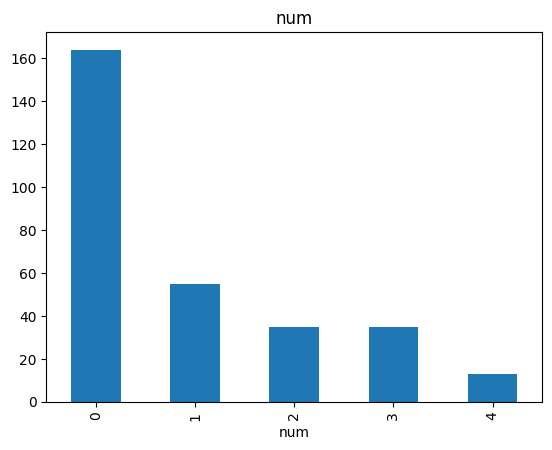

In [24]:
subset.num.value_counts().plot.bar(title='num')

### Variables de entrada

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

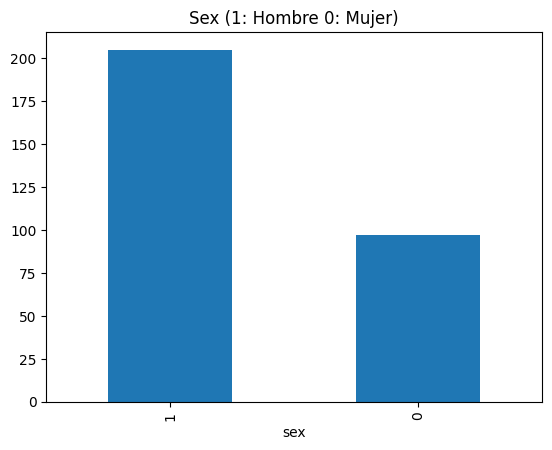

In [25]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

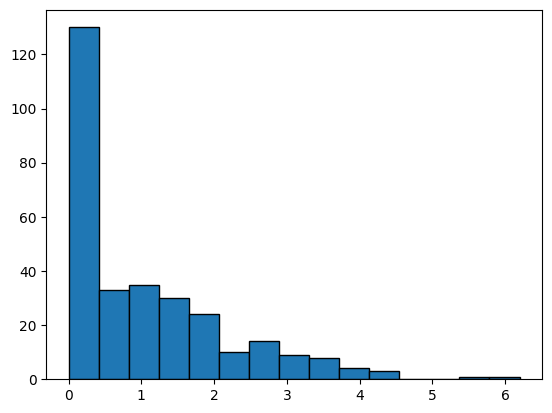

In [26]:
plt.hist(subset.oldpeak, bins=15, edgecolor='black')
plt.show()

In [27]:
fig = px.box(subset, y='oldpeak')
fig.show()

Podemos observar en el gráfico en caja que hay valores aberrantes, por lo que procedemos a eliminarlos del subset de datos con el que estamos trabajando para evitar problemas futuros en el modelado. 

In [28]:
subset = subset[subset['oldpeak'] <= 4]

In [29]:
fig = px.box(subset, y='oldpeak')
fig.show()

#### Grupo Etáreo

<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

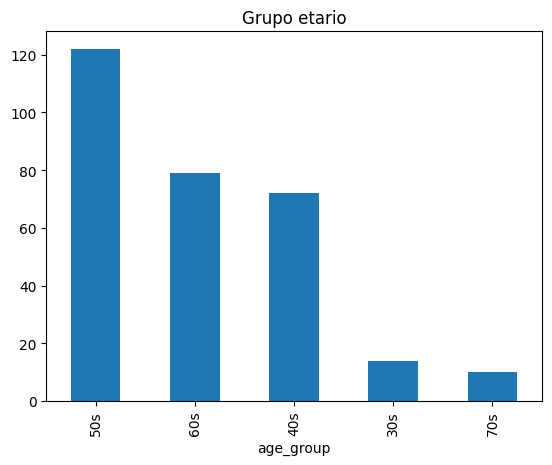

In [30]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )

#### cp - Tipo de dolor de pecho

<Axes: title={'center': 'Tipo de dolor de pecho'}, xlabel='cp'>

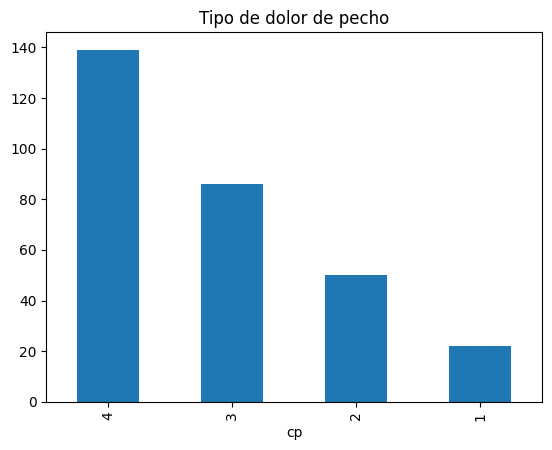

In [31]:
subset.cp.value_counts().plot.bar(title='Tipo de dolor de pecho')

#### fbs - Azúcar en sangre en ayunas > 120 mg/dl

<Axes: title={'center': 'Azúcar en sangre > 120ml/dl'}, xlabel='fbs'>

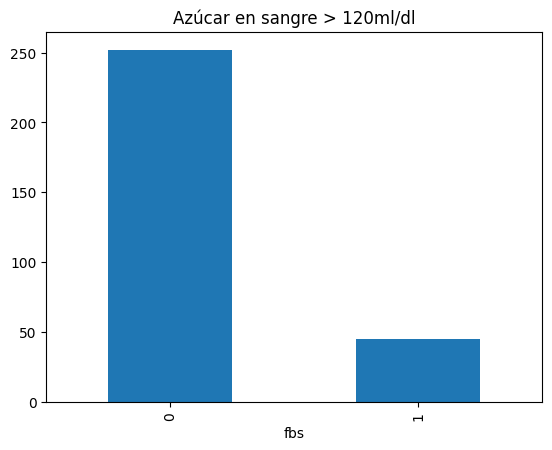

In [32]:
subset.fbs.value_counts().plot.bar(title='Azúcar en sangre > 120ml/dl')

#### restecg

<Axes: title={'center': 'restecg'}, xlabel='restecg'>

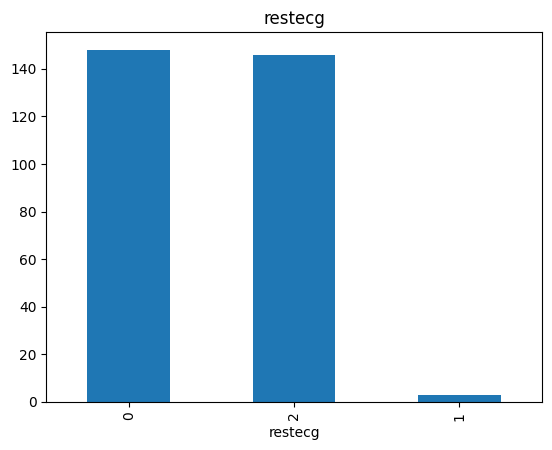

In [33]:
subset.restecg.value_counts().plot.bar(title='restecg')

#### exang - angina inducida por el ejercicio

<Axes: title={'center': 'exang'}, xlabel='exang'>

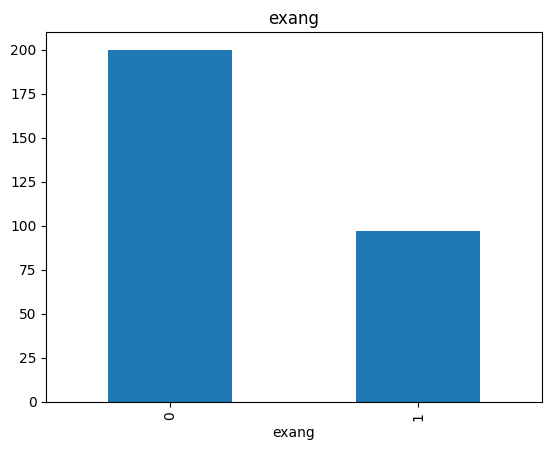

In [34]:
subset.exang.value_counts().plot.bar(title='exang')

#### slope

<Axes: title={'center': 'slope'}, xlabel='slope'>

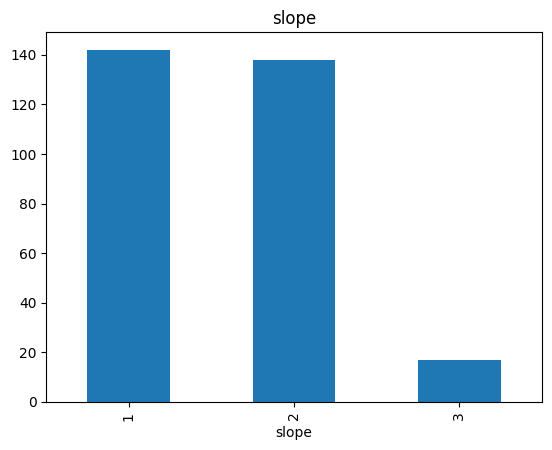

In [35]:
subset.slope.value_counts().plot.bar(title='slope')

#### ca

In [36]:
subset.ca.sample(10)

128    0.0
197    0.0
254    0.0
209    0.0
200    0.0
90     0.0
54     1.0
182    2.0
134    0.0
146    3.0
Name: ca, dtype: float64

Aca tenemos un problema, el tipo de variable de 'ca' es float, pero los datos adentro son todos enteros, asi que seran transformados en int.

In [37]:
subset['ca'] = subset['ca'].astype(int)

In [38]:
# plt.hist(subset.ca, bins=6, edgecolor='black')
# plt.show()

<Axes: xlabel='ca'>

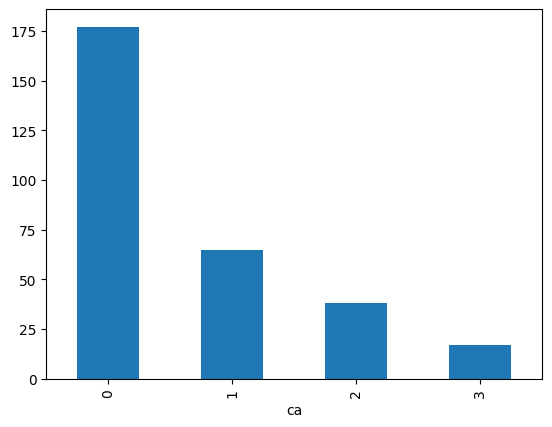

In [39]:
subset.ca.value_counts().plot.bar()

In [41]:
BETTER_COLUMN_NAMES = {
    'sex': 'sex',
    'cp': 'chest_pain',
    'fbs':'fasting_blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'depression_induced_ex',
    'slope':'slope',
    'ca':'vessels_colored_fl',
    'thal':'thalassemia',
    'num':'diagnosis',
    'age_group':'age_group',
    'cholesterol_level':'cholesterol_level',
    'bp_level':'blood_pressure_level',
    'risk_score':'risk_score',
    'symptom_severity':'symptom_severity',
    'risk_factor':'risk_factor',
    'avg_chol_by_age_group':'avg_chol_by_age_group'
}

subset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

subset

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,132,0,1.2,2,0,7.0,1,40s,high,low,12.980,1.2,8.4,235.847222
299,1,4,1,0,141,0,3.4,2,2,7.0,2,60s,low,high,14.564,13.6,95.2,260.024691
300,1,4,0,0,115,1,1.2,2,1,7.0,3,50s,low,normal,8.767,4.8,33.6,247.424000
301,0,2,0,2,174,0,0.0,2,1,3.0,1,50s,normal,normal,14.752,0.0,0.0,247.424000


Dividimos el conjunto de datos en train, validation y test

In [44]:
from sklearn.model_selection import train_test_split

train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((178, 18), (59, 18), (60, 18))

Generamos nuestro mapper

In [47]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder

mapper = DataFrameMapper([
    (['sex'], [OneHotEncoder()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()]),
    (['avg_chol_by_age_group'], [StandardScaler()])
])

mapper.fit(train)

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [OneHotEncoder()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['...red_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()]),
                          (['avg_chol_by_age_group'], [StandardScaler()])])

Vemos como realiza las transformaciones

In [50]:
sample = subset.sample(5, random_state=42)

mapper.transform(sample)

array([[ 1.        ,  0.        , -1.2979474 ,  1.        ,  0.        ,
        -1.04016243, -0.53812128,  1.        ,  0.        , -0.89855069,
         0.73480107, -0.69745485, -0.8437565 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        , -1.51873498,
        -0.80764269, -0.70080725, -1.02776992],
       [ 0.        ,  1.        , -2.37754851,  1.        ,  0.        ,
         0.97232575,  0.53610961,  1.        ,  0.        ,  0.95896669,
         0.73480107, -0.69745485,  1.23153239,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        , -0.65567796,
        -0.30209992, -0.13155692,  0.0409118 ],
       [ 1.        ,  0.        , -0.21834629,  0.        ,  1.        ,
        -1.04016243,  0.89418657,  1.        ,  0.        , -0.89855069,
        -0.96382997, -0.6974

In [51]:
mapper.transformed_names_

['sex_0',
 'sex_1',
 'chest_pain',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'depression_induced_ex',
 'slope',
 'vessels_colored_fl',
 'thalassemia',
 'age_group_0',
 'age_group_1',
 'age_group_2',
 'age_group_3',
 'age_group_4',
 'cholesterol_level_0',
 'cholesterol_level_1',
 'cholesterol_level_2',
 'blood_pressure_level_0',
 'blood_pressure_level_1',
 'blood_pressure_level_2',
 'risk_score',
 'symptom_severity',
 'risk_factor',
 'avg_chol_by_age_group']

Generamos el Pipeline

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR = pipeLR.predict(validation)

y_predLR

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0,
       2, 3, 0, 2, 0, 0, 1, 0, 0, 2, 4, 0, 0, 2, 0], dtype=int64)

Ahora se evaluarán las metricas

In [60]:
from sklearn import metrics

print(metrics.classification_report(validation.diagnosis, y_predLR))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83        31
           1       0.50      0.07      0.12        14
           2       0.10      0.50      0.17         2
           3       0.00      0.00      0.00         8
           4       0.50      0.25      0.33         4

    accuracy                           0.56        59
   macro avg       0.37      0.36      0.29        59
weighted avg       0.54      0.56      0.50        59



Claramente no parece ser un problema para resolver con logisitc regression.

Probaremos con k-NN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN = pipeKNN.predict(validation)

y_predKNN

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0], dtype=int64)

In [ ]:
print(metrics.classification_report(validation.diagnosis, y_predKNN))

Modificaremos el valor devuelto por 'diagnosis', de manera que tendremos solo dos resultados posibles [0,1]
0: sin enfermedad
1: con enfermedad

In [82]:
subset['diagnosis'] = subset['diagnosis'].apply(lambda x: 1 if x > 1 else x)

subset.diagnosis

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: diagnosis, Length: 297, dtype: int64

Realiazamos la sepracion de los datos

In [83]:
train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

Generamos la nueva Pipeline con LogisticRegression y k-NN para comparar

In [94]:
pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR_train = pipeLR.predict(train)
y_predLR_validation = pipeLR.predict(validation)

y_predLR_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

Evaluamos las metricas

In [101]:
print(metrics.classification_report(validation.diagnosis, y_predLR_validation))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.91      0.71      0.80        28

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.83        59
weighted avg       0.84      0.83      0.83        59



Text(0.5, 1.0, 'train')

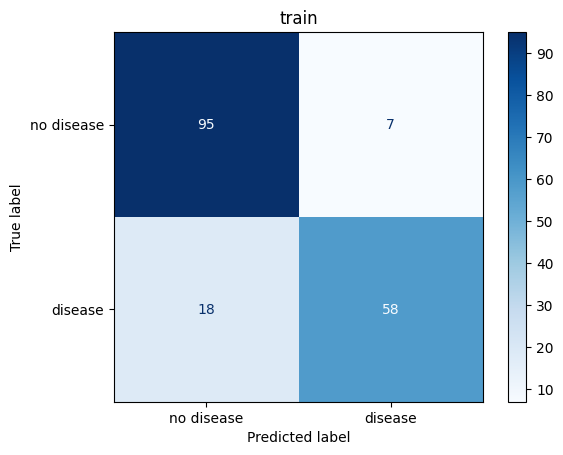

In [95]:
cm = metrics.confusion_matrix(train.diagnosis, y_predLR_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

Text(0.5, 1.0, 'validation')

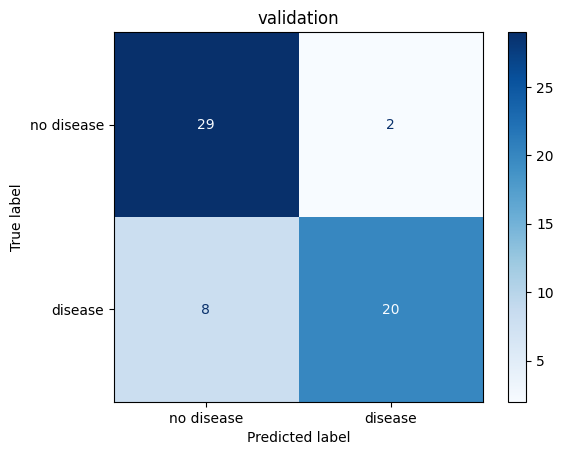

In [96]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predLR_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con los datos de 'diagnosis' modificados, las predicciones son mas precisas.

In [97]:
K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN_train = pipeKNN.predict(train)
y_predKNN_validation = pipeKNN.predict(validation)

y_predKNN_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [103]:
print(metrics.classification_report(validation.diagnosis, y_predKNN_validation))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79        31
           1       0.88      0.54      0.67        28

    accuracy                           0.75        59
   macro avg       0.79      0.74      0.73        59
weighted avg       0.78      0.75      0.73        59



Text(0.5, 1.0, 'train')

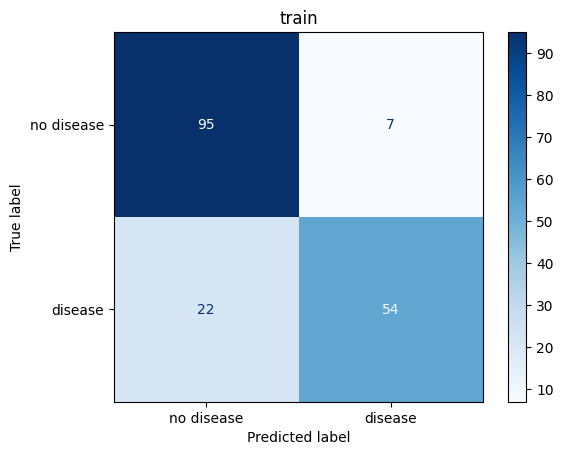

In [104]:
cm = metrics.confusion_matrix(train.diagnosis, y_predKNN_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

Text(0.5, 1.0, 'validation')

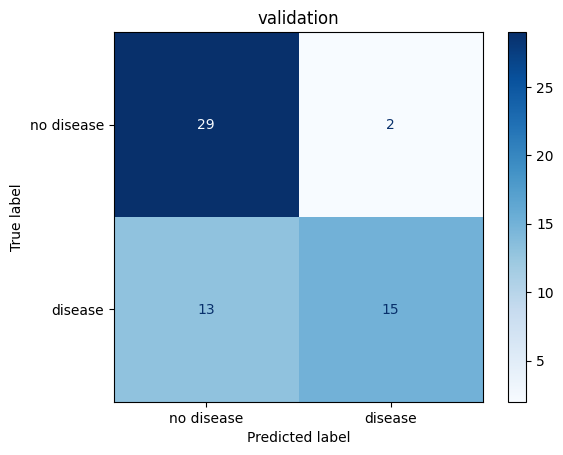

In [105]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predKNN_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con un KNN con k=10 vemos que es pero que Logistic Regression

In [106]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

gs_pipe = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

gs_pipe.fit(train, train.diagnosis)

clf.best_score_, clf.best_params_

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Fitting 5 folds for each of 8 candidates, totalling 40 fits


(0.8196825396825398, {'n_neighbors': 15})

In [117]:
K=15

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])

pipeKNN.fit(train, train.diagnosis)

kNN_train = pipeKNN.predict(train)
kNN_validation = pipeKNN.predict(validation)

kNN_validation

c:\ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [118]:
print(metrics.classification_report(validation.diagnosis, kNN_validation))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        31
           1       0.89      0.61      0.72        28

    accuracy                           0.78        59
   macro avg       0.81      0.77      0.77        59
weighted avg       0.81      0.78      0.77        59



Una vez evaluado el modelo con Logistic Regression y con k-NN con un k=15 vemos que el Logistic Regression tiene una mayor acuracy [LogisticRegression: 83, k-NN: 78]

### Listado de posibles dudas/preguntas al encargado de proveer los datos

1- Que tan fiable son los datos?

## 3- Hipótesis sobre los datos
### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

### b. Comprobación de la hipótesis


### c. Creación de nuevas variables